## Week 7 Decision Tree

决策树的理解：
决策树是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果。

决策树是一种十分常用的分类方法，需要监管学习（有教师的Supervised Learning），

监管学习就是给出一堆样本，每个样本都有一组属性和一个分类结果，也就是分类结果已知，那么通过学习这些样本得到一个决策树，

这个决策树能够对新的数据给出正确的分类。这里通过一个简单的例子来说明决策树的构成思路：

举例说明 

给出如下的一组数据，一共有十个样本（学生数量），

每个样本有分数，出勤率，回答问题次数，作业提交率四个属性，最后判断这些学生是否是好学生。

最后一列给出了人工分类结果。

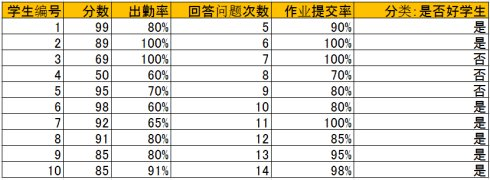

然后用这一组附带分类结果的样本可以训练出多种多样的决策树，这里为了简化过程，我们假设决策树为二叉树，且类似于下图：

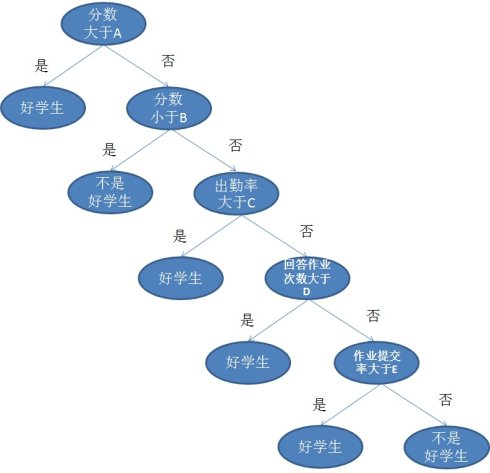

通过学习上表的数据，可以设置A，B，C，D，E的具体值，而A，B，C，D，E则称为阈值。当然也可以有和上图完全不同的树形，比如下图这种的：

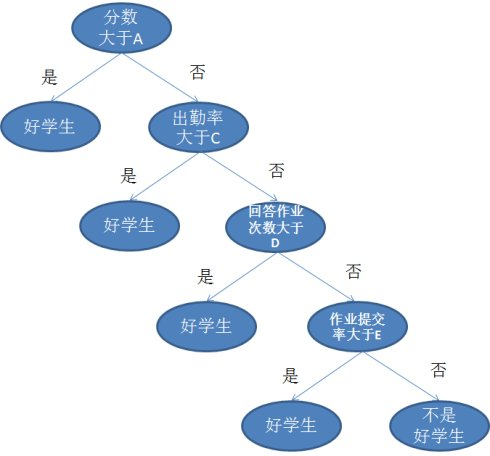

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Boston.csv')

In [3]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.drop(columns=['Unnamed: 0'])


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# 定义function 输出Linear regression的图像
def lin_regplot(X, y, model):
    #输出点状图
    plt.scatter(X, y, c='lightblue')
    #输出拟合曲线
    plt.plot(X, model.predict(X), color='r', linewidth=2)
    return

In [6]:
X = df[['rm']].values
y = df[['medv']].values

In [14]:
# import DecisionTreeRegressor from sklearn package
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
#DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=1)
#使用之前定义的XY输入输出变量来fit模型
tree.fit(X,y)
#预计输出值y_pred
y_pred = tree.predict(X)


In [27]:
print('MSE train: %0.3f, test: %.3f' % (mean_squared_error(y, y_pred), r2_score(y, y_pred)))

MSE train: 46.199, test: 0.453


In [28]:
sort_idx = X.flatten().argsort()

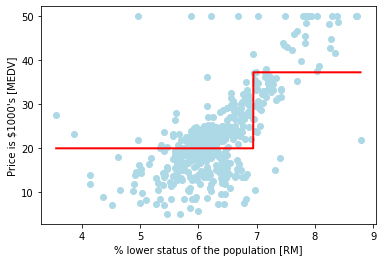

In [29]:
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [RM]')
plt.ylabel('Price is $1000\'s [MEDV]')
plt.show()

MSE train: 31.732, test: 0.624


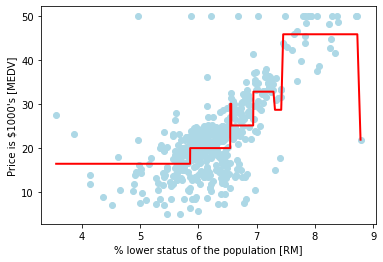

In [31]:
#DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
#使用之前定义的XY输入输出变量来fit模型
tree.fit(X,y)
#预计输出值y_pred
y_pred = tree.predict(X)
print('MSE train: %0.3f, test: %.3f' % (mean_squared_error(y, y_pred), r2_score(y, y_pred)))
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [RM]')
plt.ylabel('Price is $1000\'s [MEDV]')
plt.show()

MSE train: 4.443, test: 0.947


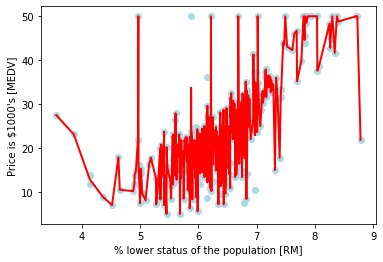

In [32]:
#DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=30)
#使用之前定义的XY输入输出变量来fit模型
tree.fit(X,y)
#预计输出值y_pred
y_pred = tree.predict(X)
print('MSE train: %0.3f, test: %.3f' % (mean_squared_error(y, y_pred), r2_score(y, y_pred)))
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [RM]')
plt.ylabel('Price is $1000\'s [MEDV]')
plt.show()

ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

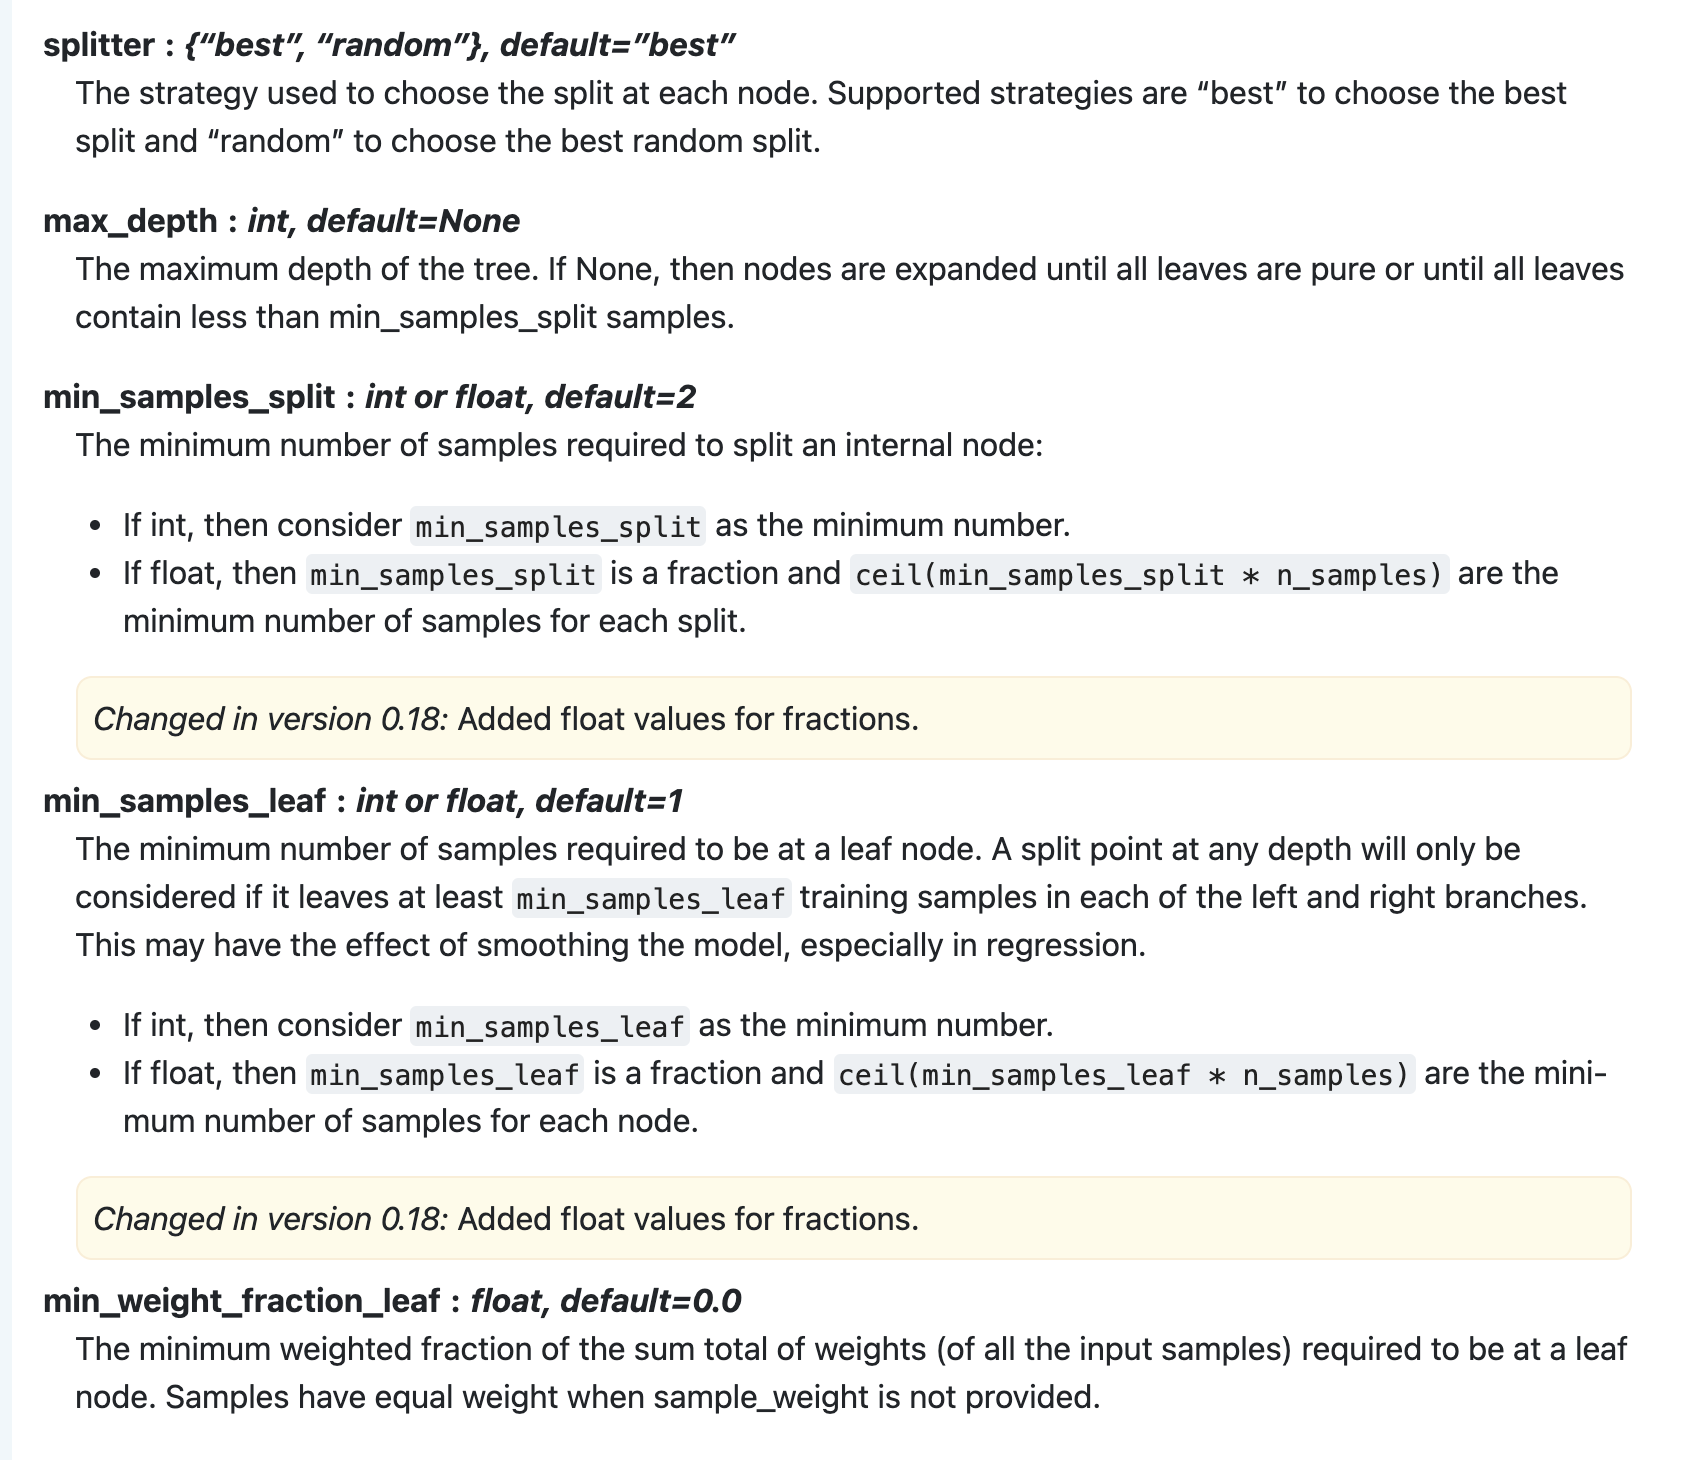

How to improve your model?

1. cross-validation
2. more data?
3. Data cleaning?
4. outlier data
5. tree level?
...